# Bay Area Ford GoBike Data
## Andres Munoz

## Investigation Overview

> Typical trip

> Typical user

> Geolocation of trips

> Bike utilization


## Dataset Overview

> This dataset contains info for the Ford bike ride sharing program

> Years 2017 and 2018

> Location is the Bay area 

> The data was downloaded from https://s3.amazonaws.com/fordgobike-data/index.html

In [9]:
# import all packages and set plots to be embedded inline
import datetime
import folium
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import webbrowser

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
# load in the dataset into a pandas dataframe

# read DFs from the Exploratory Jupyter Notebook
df             = pd.read_pickle('df.pkl')
df_bikes_rides = pd.read_pickle('df_bikes_rides.pkl')
df_bikes_hr    = pd.read_pickle('df_bikes_hr.pkl')
df_stations    = pd.read_pickle('df_stations.pkl')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## TRIP - Duration

> The typical user takes rides the bikes for this duration in minutes

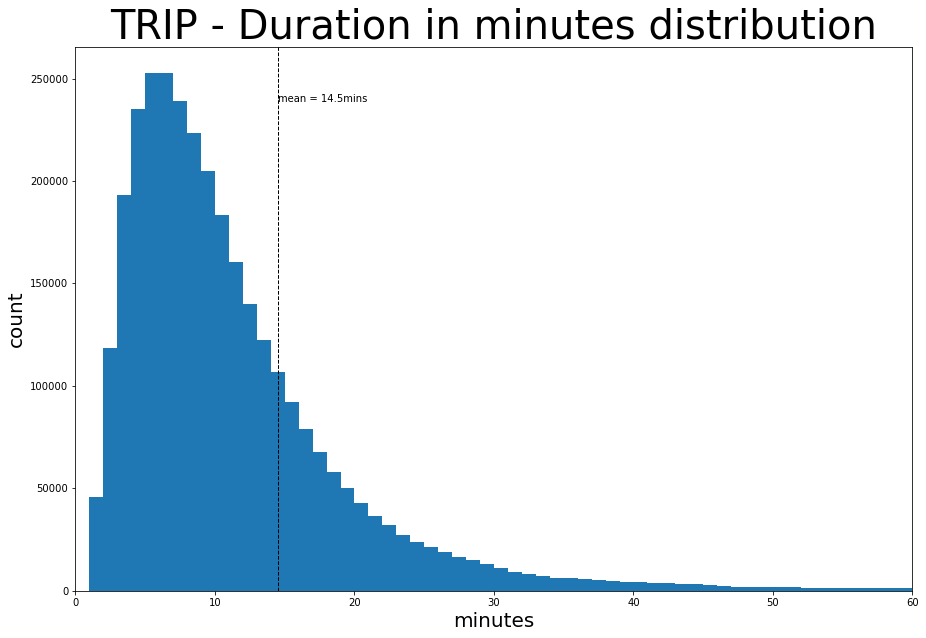

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
bins = np.arange(0, df['duration_min'].max() + 1.0, 1)
ax.hist(df['duration_min'], bins=bins)
ax.set_title('TRIP - Duration in minutes distribution', fontsize=40)
ax.set_xlabel('minutes', fontsize=20)
ax.set_ylabel('count', fontsize=20)
ax.set_xlim([0, 60])
y_min, y_max = ax.get_ylim()
plt.axvline(df['duration_min'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(df['duration_min'].mean(), y_max*0.9, 'mean = '+str(df['duration_min'].mean())[:4]+'mins')
plt.show()

## USER - Type

> User distribution subscriber(membership) Vs. customer(casual)

> User gender distribution

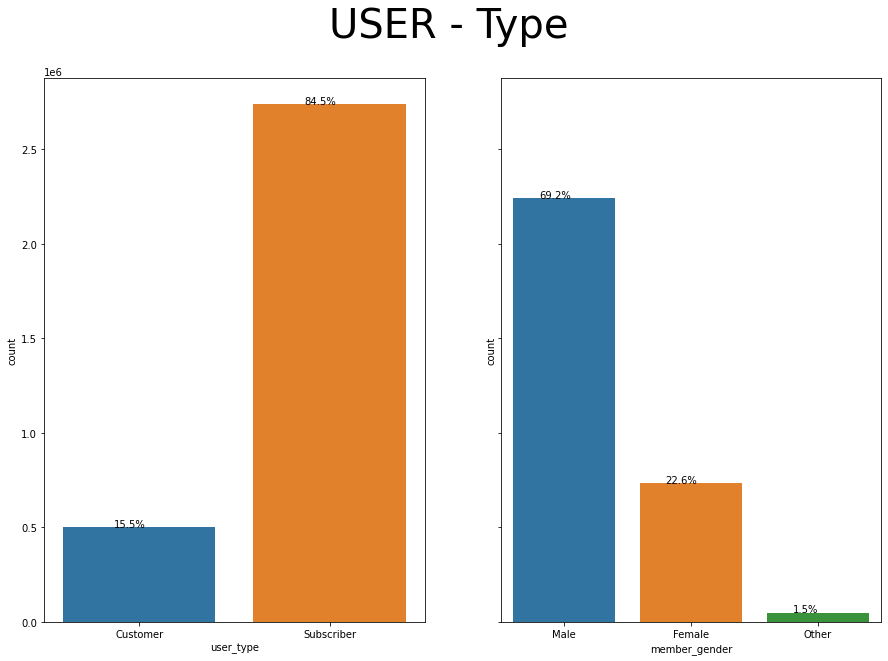

In [12]:
# User type in a single plot

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,10))
fig.suptitle('USER - Type', fontsize=40)

sb.countplot(data=df, x='user_type', ax=ax1);
total = len(df['user_type'])
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 3
        y = p.get_y() + p.get_height()
        ax1.annotate(percentage, (x, y))

sb.countplot(data=df, x='member_gender', ax=ax2);
total = len(df['member_gender'])
for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 4
        y = p.get_y() + p.get_height()
        ax2.annotate(percentage, (x, y))
        

## Geolocation

> Top 10 most common start stations

> Heatmap of all start stations

> Top 5 most common rides


In [13]:
# Folium map variables
map_center_lat = df['start_station_latitude'].mean() + 0.02
map_center_lon = df['start_station_longitude'].mean()
map_zoom_start = 12.5

fname = 'map1_top_start_stations.html'
m = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=map_zoom_start)
for ix, row in df_stations.head(20).iterrows():
    popup = str(row['counts'])
    tooltip = row['start_station_name'] 
    icon = folium.Icon(icon='bicycle', prefix='fa')
    folium.Marker([row['start_station_latitude'], row['start_station_longitude']], popup=popup, tooltip=tooltip, icon=icon).add_to(m)
m.save(fname)
#webbrowser.open(fname)

from IPython.display import IFrame
IFrame(src=fname, width=900, height=600)

In [14]:
# values for heatmap
data = df_stations[['start_station_latitude', 'start_station_longitude', 'counts']].values.tolist()

fname = 'map2_heatmap_start_stations.html'
m = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=map_zoom_start-1)
from folium.plugins import HeatMap
HeatMap(data).add_to(m)
m.save(fname)
#webbrowser.open(fname)

from IPython.display import IFrame
IFrame(src=fname, width=900, height=600)

In [15]:
# most common trips start to finish
subset=['start_station_latitude', 'end_station_latitude', 'start_station_longitude','end_station_longitude']
df_unique_trips1 = df[df.duplicated(subset=subset, keep=False)]
df_unique_trips2 = df_unique_trips1.pivot_table(index=subset, aggfunc='size').reset_index()
df_unique_trips2.rename(columns={0:'unique_trip_counts'}, inplace=True)
df_unique_trips2.sort_values('unique_trip_counts', axis=0, ascending=False, inplace=True)

fname = 'map3_top_unique_trips.html'
m = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=map_zoom_start-1)
for ix, row in df_unique_trips2.head(10).iterrows():
    folium.CircleMarker([row['start_station_latitude'], row['start_station_longitude']], radius=10, color='blue').add_to(m)
    folium.CircleMarker([row['end_station_latitude'], row['end_station_longitude']],     radius=10, color='red',).add_to(m)
    folium.PolyLine([[row['start_station_latitude'], row['start_station_longitude']], 
                     [row['end_station_latitude'], row['end_station_longitude']]]).add_to(m)
m.save(fname)
#webbrowser.open(fname)

from IPython.display import IFrame
IFrame(src=fname, width=900, height=600)

## BIKE Utilization

> How many times have the bikes been used for the studied period

> How many hours have the bikes been used for the studied period

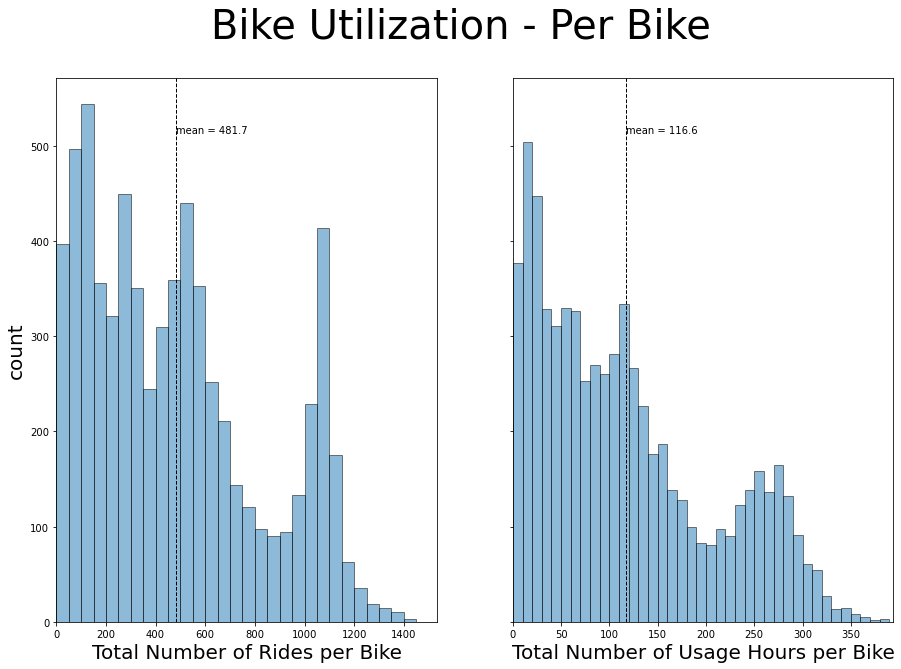

In [16]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,10))
fig.suptitle('Bike Utilization - Per Bike', fontsize=40)

# histogram - total rides
bins = np.arange(0, df_bikes_rides['number_of_rides'].max() + 1.0, 50)
ax[0].set_xlim(0,df_bikes_rides['number_of_rides'].max() + 1.0)
ax[0].hist(df_bikes_rides['number_of_rides'], bins=bins, alpha=0.5, histtype='bar', ec='black')
ax[0].set_xlabel('Total Number of Rides per Bike', fontsize=20)
ax[0].set_ylabel('count', fontsize=20)
y_min, y_max = ax[0].get_ylim()
ax[0].axvline(df_bikes_rides['number_of_rides'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0].text(df_bikes_rides['number_of_rides'].mean(), y_max*0.9, 'mean = '+str(df_bikes_rides['number_of_rides'].mean())[:5])

# histogram - total hours
bins = np.arange(0, df_bikes_hr['duration_hr'].max() + 1.0, 10)
ax[1].set_xlim(0,df_bikes_hr['duration_hr'].max() + 1.0)
ax[1].hist(df_bikes_hr['duration_hr'], bins=bins, alpha=0.5, histtype='bar', ec='black')
ax[1].set_xlabel('Total Number of Usage Hours per Bike', fontsize=20)
y_min, y_max = ax[0].get_ylim()
ax[1].axvline(df_bikes_hr['duration_hr'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1].text(df_bikes_hr['duration_hr'].mean(), y_max*0.9, 'mean = '+str(df_bikes_hr['duration_hr'].mean())[:5])

plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:

> > Sub-slides showing code

> > `jupyter nbconvert my_notebook.ipynb --to slides --post serve`

> > Sub-slides with NO code

> > `jupyter nbconvert --to slides --TemplateExporter.exclude_input=True my_notebook.ipynb`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!